
**Autor**: Guilherme Ribeiro Maia

**Contato**: 
email: `gribeiromaia91@gmail.com`

linkedin: https://www.linkedin.com/in/guilherme-ribeiro-maia-650589112/

<br>
<img align="left" width="280" src="https://hermes.digitalinnovation.one/site/images/logo-sm-white.png"/>
<br>


---



<center><p><h1>Construção de Modelos de Machine Learning e Comparação dos Algoritmos
<h1></p></center>

# Definição do Público

<br>
<img align="left" width="70" src="https://img.icons8.com/color/452/ms-excel.png"/>
<br>

**Público - Variávies - Alvo**

# Metodos de Avalização dos Modelos


Para os problemas de classificação, a avaliação deve ser feita entre a resposta obtida pelo modelo e a resposta esperada. 

### Matriz de Confusão

A matriz de confusão é especialmente útil para avaliação de classificadores binários. É importante salientar que as duas classes presentes no problema devem ser definidas como 'classe positiva' e 'classe negativa'.

<img src=https://dinomagri.com/data/imgs/cm.png width="500"/>

* **True Positive (TP)**: classificação correta na classe positiva. O exemplar pertence à classe **positiva**, e o classificador o classificou como **positiva**
* **False Positive (FP)**: classificação incorreta na classe positiva. O exemplar pertence à classe **negativa**, mas o classificador o classificou como **positiva**
* **True Negative (TN)**: classificação correta na classe negativa. O exemplar pertencente à classe **negativa**, e o classificador o classificou como **negativa**
* **False Negative (FN)**: classificação incorreta na classe negativa. O exemplar pertence à classe **positiva**, mas o classificador o classificou como **negativa**

### Acurácia

É a diagonal principal (TP e TN) da matriz de confusão.

`Acurácia = (TP + TN) / TOTAL`

Outras metricas podem ser contruidas com base nessa matriz, são elas: Recall ou Sensibilidade ou Taxa de verdadeiros positivos, Precision ou Preditividade positiva, F1-Score, Taxa de Verdadeiros Negativos ou Especificidade, Taxa de Falsos Positivos e etc. 

## ROC

A curva AUC - ROC é uma medida de desempenho para os problemas de classificação em várias configurações de limite. ROC é uma curva de probabilidade e AUC representa o grau ou medida de separabilidade. Diz o quanto o modelo é capaz de distinguir entre as classes. Quanto maior a AUC, melhor será o modelo em prever o valor 0 quando realmente o target é 0 e caso contrario também. Por analogia, quanto maior a AUC, melhor será o modelo em distinguir seu alvo.


|Valores de Roc | Nível de Discriminação|
|-|-|
|0.5 <= ROC < 0.7 | Baixa Discriminação |
|0.7 <= ROC < 0.8 | Discriminação Aceitável |
|0.8 <= ROC < 0.9 | Excelente Discriminação |
|ROC >= 0.9	| Excelente Discriminação (Não são muito comuns)|

Material de Referência: https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5

# Pacotes Utilizados

In [65]:
#Manipulação de Dados
import pandas as pd
import numpy as np

#Algoritmos de ML
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
import xgboost as xgb 

from sklearn.preprocessing import StandardScaler

#Separação do banco de dados
from sklearn.model_selection import train_test_split 

#Metricas de Adequabilidade
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

#Leitura de dados PARQUET 
import sys
!pip install pyarrow

# Lendo os dados

Nesta competição, você é desafiado a construir um modelo que preveja a probabilidade de um motorista indicar um sinistro de seguro automóvel no próximo ano. 

https://www.kaggle.com/c/porto-seguro-safe-driver-prediction

In [81]:
dados = pd.read_parquet('/content/drive/MyDrive/Digital Innovation One/porto_seguro_kaggle.parquet', engine='pyarrow')

In [82]:
dados.head()

,b'id',b'target',b'ps_ind_01',b'ps_ind_02_cat',b'ps_ind_03',b'ps_ind_04_cat',b'ps_ind_05_cat',b'ps_ind_06_bin',b'ps_ind_07_bin',b'ps_ind_08_bin',b'ps_ind_09_bin',b'ps_ind_10_bin',b'ps_ind_11_bin',b'ps_ind_12_bin',b'ps_ind_13_bin',b'ps_ind_14',b'ps_ind_15',b'ps_ind_16_bin',b'ps_ind_17_bin',b'ps_ind_18_bin',b'ps_reg_01',b'ps_reg_02',b'ps_reg_03',b'ps_car_01_cat',b'ps_car_02_cat',b'ps_car_03_cat',b'ps_car_04_cat',b'ps_car_05_cat',b'ps_car_06_cat',b'ps_car_07_cat',b'ps_car_08_cat',b'ps_car_09_cat',b'ps_car_10_cat',b'ps_car_11_cat',b'ps_car_11',b'ps_car_12',b'ps_car_13',b'ps_car_14',b'ps_car_15',b'ps_calc_01',b'ps_calc_02',b'ps_calc_03',b'ps_calc_04',b'ps_calc_05',b'ps_calc_06',b'ps_calc_07',b'ps_calc_08',b'ps_calc_09',b'ps_calc_10',b'ps_calc_11',b'ps_calc_12',b'ps_calc_13',b'ps_calc_14',b'ps_calc_15_bin',b'ps_calc_16_bin',b'ps_calc_17_bin',b'ps_calc_18_bin',b'ps_calc_19_bin',b'ps_calc_20_bin'
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [83]:
dados = dados.set_index(b'id')

In [84]:
x_train, x_test, y_train, y_test = train_test_split(dados.drop([b'target'], axis = 1), 
                                                    dados[b'target'], 
                                                    test_size = 0.3, 
                                                    random_state = 19910912)

[{'treino': x_train.shape}, {'teste': x_test.shape}]

[{'treino': (416648, 57)}, {'teste': (178564, 57)}]

# Estudo do Target

In [85]:
y_train.value_counts(normalize = True)

0    0.96349
1    0.03651
Name: b'target', dtype: float64

In [86]:
y_test.value_counts(normalize = True)

0    0.963699
1    0.036301
Name: b'target', dtype: float64

# Tratamento dos Dados

In [87]:
scaler = StandardScaler().fit(x_train)

In [88]:
x_train = scaler.transform(x_train)

In [89]:
x_test = scaler.transform(x_test)

In [91]:
x_test

array([[-0.95771037,  0.96497321, -1.63757761, ...,  1.57650536,
        -0.73134   , -0.42539589],
       [-0.45339096, -0.5401655 ,  0.58529895, ..., -0.63431437,
        -0.73134   , -0.42539589],
       [ 2.57252552, -0.5401655 ,  0.58529895, ...,  1.57650536,
         1.36735308, -0.42539589],
       ...,
       [-0.45339096, -0.5401655 , -0.89661876, ..., -0.63431437,
        -0.73134   , -0.42539589],
       [-0.95771037, -0.5401655 ,  2.43769609, ..., -0.63431437,
        -0.73134   , -0.42539589],
       [-0.95771037, -0.5401655 ,  0.58529895, ..., -0.63431437,
        -0.73134   ,  2.35075141]])

<br>
<img align="left" width="80" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ1ILPRcArPCSYK3f0OkpLSLl9TAR5nD_EJzWc5sPiC6pVLLwiUxb46q--Br1ygGemVFjg&usqp=CAU"/>
<br> 


# Machine Learning - Supervisionado

## Logistica (~10seg)


In [92]:
logreg = LogisticRegression(penalty = 'l2', 
                            C = 0.1, 
                            fit_intercept = True, 
                            solver = 'liblinear', 
                            max_iter = 1000, 
                            multi_class = 'ovr', 
                            n_jobs = 1)

logreg.fit(x_train, y_train)

#PREDICAO
y_pred_logreg_train = logreg.predict(x_train)
y_score_logreg_train = logreg.predict_proba(x_train)

y_pred_logreg_test = logreg.predict(x_test)
y_score_logreg_test = logreg.predict_proba(x_test)

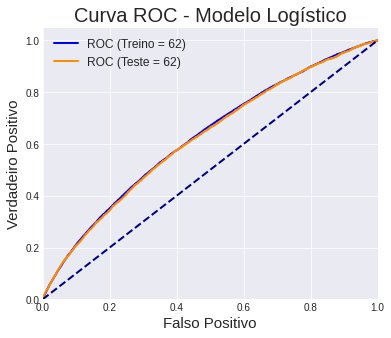

Acurácia, Gini e Área Curva ROC (Base de Treino):  96.349 24.8 62.4
Acurácia, Gini e Área Curva ROC (Base de Teste):  96.37 24.2 62.1


In [47]:
#ACURACIA
acc_logreg_train = round(accuracy_score(y_pred_logreg_train, y_train) * 100, 3)
acc_logreg_test = round(accuracy_score(y_pred_logreg_test, y_test) * 100, 3)

#ROC
fpr_logreg_train, tpr_logreg_train, thresholds = roc_curve(y_train, y_score_logreg_train[:,1])
roc_auc_logreg_train = 100*round(auc(fpr_logreg_train, tpr_logreg_train), 3)
gini_logreg_train = 100*round((2*roc_auc_logreg_train/100 - 1), 3)

fpr_logreg_test, tpr_logreg_test, thresholds = roc_curve(y_test, y_score_logreg_test[:,1])
roc_auc_logreg_test = 100*round(auc(fpr_logreg_test, tpr_logreg_test), 3)
gini_logreg_test = 100*round((2*roc_auc_logreg_test/100 - 1), 3)

#GRAFICO
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(6,5))
lw = 2
plt.plot(fpr_logreg_train, tpr_logreg_train, color='blue',lw=lw, label='ROC (Treino = %0.0f)' % roc_auc_logreg_train)
plt.plot(fpr_logreg_test, tpr_logreg_test, color='darkorange',lw=lw, label='ROC (Teste = %0.0f)' % roc_auc_logreg_test)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso Positivo', fontsize=15)
plt.ylabel('Verdadeiro Positivo', fontsize=15)
plt.legend(loc="lower right")
plt.legend(fontsize = 12) 
plt.title('Curva ROC - Modelo Logístico', fontsize=20)
plt.show()

print('Acurácia, Gini e Área Curva ROC (Base de Treino): ',acc_logreg_train, gini_logreg_train, roc_auc_logreg_train)
print('Acurácia, Gini e Área Curva ROC (Base de Teste): ',acc_logreg_test, gini_logreg_test, roc_auc_logreg_test)

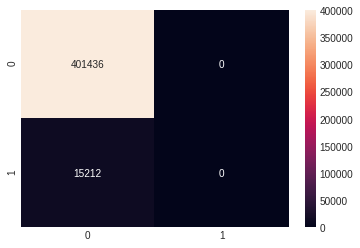

In [48]:
cm = confusion_matrix(y_train, y_pred_logreg_train)
sns.heatmap(cm, annot = True, fmt = 'g');

No eixo "Y" estmos olhando o target observado na base, já no eixo "X" o retorno do modelo.

## Arvore (7seg)

In [49]:
dectree = DecisionTreeClassifier(criterion='gini', 
                                 splitter='best', 
                                 max_depth=7)
dectree.fit(x_train, y_train)


#PREDICAO
y_pred_dectree_train = dectree.predict(x_train)
y_score_dectree_train = dectree.predict_proba(x_train)[:,1]

y_pred_dectree_test = dectree.predict(x_test)
y_score_dectree_test = dectree.predict_proba(x_test)[:,1]

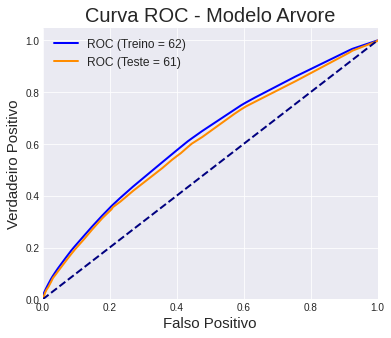

Acurácia, Gini e Área Curva ROC (Base de Treino):  96.36 24.0 62.0
Acurácia, Gini e Área Curva ROC (Base de Teste):  96.35 22.0 61.0


In [50]:
#ACURACIA
acc_dectree_train = round(accuracy_score(y_pred_dectree_train, y_train) * 100, 2)
acc_dectree_test = round(accuracy_score(y_pred_dectree_test, y_test) * 100, 2)

#ROC
fpr_dectree_train, tpr_dectree_train, thresholds = roc_curve(y_train, y_score_dectree_train)
roc_auc_dectree_train = 100*round(auc(fpr_dectree_train, tpr_dectree_train), 2)
gini_dectree_train = 100*round((2*roc_auc_dectree_train/100 - 1), 2)

fpr_dectree_test, tpr_dectree_test, thresholds = roc_curve(y_test, y_score_dectree_test)
roc_auc_dectree_test = 100*round(auc(fpr_dectree_test, tpr_dectree_test), 2)
gini_dectree_test = 100*round((2*roc_auc_dectree_test/100 - 1), 2)

#GRAFICO
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(6,5))
lw = 2
plt.plot(fpr_dectree_train, tpr_dectree_train, color='blue',lw=lw, label='ROC (Treino = %0.0f)' % roc_auc_dectree_train)
plt.plot(fpr_dectree_test, tpr_dectree_test, color='darkorange',lw=lw, label='ROC (Teste = %0.0f)' % roc_auc_dectree_test)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso Positivo', fontsize=15)
plt.ylabel('Verdadeiro Positivo', fontsize=15)
plt.legend(loc="lower right")
plt.legend(fontsize=12) 
plt.title('Curva ROC - Modelo Arvore', fontsize=20)
plt.show()

print('Acurácia, Gini e Área Curva ROC (Base de Treino): ',acc_dectree_train, gini_dectree_train, roc_auc_dectree_train)
print('Acurácia, Gini e Área Curva ROC (Base de Teste): ',acc_dectree_test, gini_dectree_test, roc_auc_dectree_test)

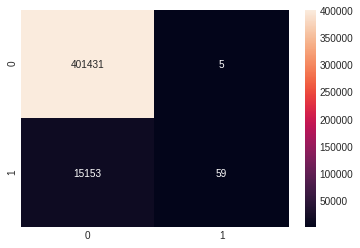

In [51]:
cm = confusion_matrix(y_train, y_pred_dectree_train)
sns.heatmap(cm, annot = True, fmt = 'g');

## RandonForest (~1 mim)


In [52]:
rndforest = RandomForestClassifier(n_estimators = 100, 
                                   criterion = 'gini', 
                                   max_depth = 6, 
                                   max_features = 'auto')

rndforest.fit(x_train, y_train)

#PREDICAO
y_pred_rndforest_train = rndforest.predict(x_train)
y_score_rndforest_train = rndforest.predict_proba(x_train)[:,1]

y_pred_rndforest_test = rndforest.predict(x_test)
y_score_rndforest_test = rndforest.predict_proba(x_test)[:,1]

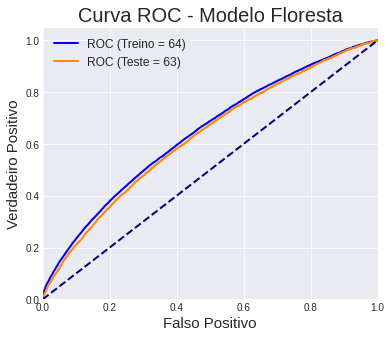

Acurácia, Gini e Área Curva ROC (Base de Treino):  96.35 28.000000000000004 64.0
Acurácia, Gini e Área Curva ROC (Base de Teste):  96.37 26.0 63.0


In [53]:
#ACURACIA
acc_rndforest_train = round(accuracy_score(y_pred_rndforest_train, y_train) * 100, 2)
acc_rndforest_test = round(accuracy_score(y_pred_rndforest_test, y_test) * 100, 2)

#ROC
fpr_rndforest_train, tpr_rndforest_train, thresholds = roc_curve(y_train, y_score_rndforest_train)
roc_auc_rndforest_train = 100*round(auc(fpr_rndforest_train, tpr_rndforest_train), 2)
gini_rndforest_train = 100*round((2*roc_auc_rndforest_train/100 - 1), 2)

fpr_rndforest_test, tpr_rndforest_test, thresholds = roc_curve(y_test, y_score_rndforest_test)
roc_auc_rndforest_test = 100*round(auc(fpr_rndforest_test, tpr_rndforest_test), 2)
gini_rndforest_test = 100*round((2*roc_auc_rndforest_test/100 - 1), 2)

#GRAFICO
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(6,5))
lw = 2
plt.plot(fpr_rndforest_train, tpr_rndforest_train, color='blue',lw=lw, label='ROC (Treino = %0.0f)' % roc_auc_rndforest_train)
plt.plot(fpr_rndforest_test, tpr_rndforest_test, color='darkorange',lw=lw, label='ROC (Teste = %0.0f)' % roc_auc_rndforest_test)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso Positivo', fontsize=15)
plt.ylabel('Verdadeiro Positivo', fontsize=15)
plt.legend(loc="lower right")
plt.legend(fontsize=12) 
plt.title('Curva ROC - Modelo Floresta', fontsize=20)
plt.show()

print('Acurácia, Gini e Área Curva ROC (Base de Treino): ',acc_rndforest_train, gini_rndforest_train, roc_auc_rndforest_train)
print('Acurácia, Gini e Área Curva ROC (Base de Teste): ',acc_rndforest_test, gini_rndforest_test, roc_auc_rndforest_test)

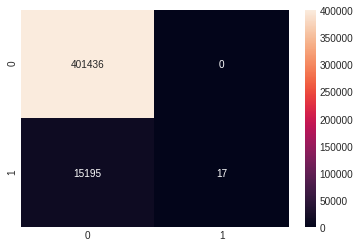

In [ ]:
cm = confusion_matrix(y_train, y_pred_rndforest_train)
sns.heatmap(cm, annot = True, fmt = 'g');

## Gradiente Boosting (~6mim)

In [54]:
gbc = GradientBoostingClassifier(loss = 'deviance', 
                                 learning_rate = 0.01,
                                 n_estimators = 100, 
                                 criterion = 'friedman_mse',
                                 max_depth = 5,
                                 verbose = 0, 
                                 tol = 0.0001)
 
gbc.fit(x_train, y_train)

#PREDICAO
y_pred_gbc_train = gbc.predict(x_train)
y_score_gbc_train = gbc.predict_proba(x_train)[:,1]

y_pred_gbc_test = gbc.predict(x_test)
y_score_gbc_test = gbc.predict_proba(x_test)[:,1]

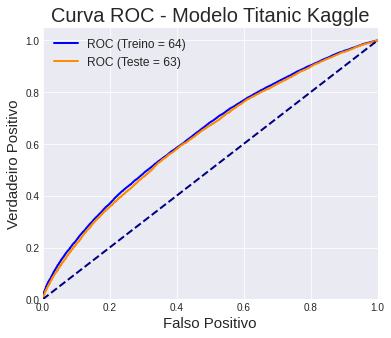

Acurácia, Gini e Área Curva ROC (Base de Treino):  96.353 27.12 63.56
Acurácia, Gini e Área Curva ROC (Base de Teste):  96.3677 25.36 62.68


In [55]:
#ACURACIA
acc_gbc_train = round(accuracy_score(y_pred_gbc_train, y_train) * 100, 4)
acc_gbc_test = round(accuracy_score(y_pred_gbc_test, y_test) * 100, 4)

#ROC
fpr_gbc_train, tpr_gbc_train, thresholds = roc_curve(y_train, y_score_gbc_train)
roc_auc_gbc_train = 100*round(auc(fpr_gbc_train, tpr_gbc_train), 4)
gini_gbc_train = 100*round((2*roc_auc_gbc_train/100 - 1), 4)

fpr_gbc_test, tpr_gbc_test, thresholds = roc_curve(y_test, y_score_gbc_test)
roc_auc_gbc_test = 100*round(auc(fpr_gbc_test, tpr_gbc_test), 4)
gini_gbc_test = 100*round((2*roc_auc_gbc_test/100 - 1), 4)

#GRAFICO
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(6,5))
lw = 2
plt.plot(fpr_gbc_train, tpr_gbc_train, color='blue',lw=lw, label='ROC (Treino = %0.0f)' % roc_auc_gbc_train)
plt.plot(fpr_gbc_test, tpr_gbc_test, color='darkorange',lw=lw, label='ROC (Teste = %0.0f)' % roc_auc_gbc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso Positivo', fontsize=15)
plt.ylabel('Verdadeiro Positivo', fontsize=15)
plt.legend(loc="lower right")
plt.legend(fontsize=12) 
plt.title('Curva ROC - Modelo Titanic Kaggle', fontsize=20)
plt.show()

print('Acurácia, Gini e Área Curva ROC (Base de Treino): ',acc_gbc_train, gini_gbc_train, roc_auc_gbc_train)
print('Acurácia, Gini e Área Curva ROC (Base de Teste): ',acc_gbc_test, gini_gbc_test, roc_auc_gbc_test)

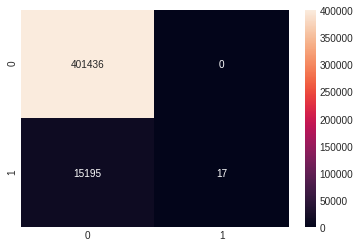

In [56]:
cm = confusion_matrix(y_train, y_pred_gbc_train)
sns.heatmap(cm, annot = True, fmt = 'g');

# LightGBM (~1mim)

In [ ]:
lgbm_skl = lgb.LGBMClassifier(boosting_type = 'gbdt',
                              objective='binary', 
                              metric='auc',
                              max_depth = 6,
                              n_estimators = 200,
                              is_unbalance = True,
                              learning_rate = 0.01)

lgbm_skl.fit(x_train, y_train,
             early_stopping_rounds = 10, 
             eval_metric='auc',
             eval_set = [(x_train, y_train),(x_test, y_test)])

#PREDICAO
y_pred_lgb_train = lgbm_skl.predict(x_train)
y_score_lgb_train = lgbm_skl.predict_proba(x_train)[:,1]

y_pred_lgb_test = lgbm_skl.predict(x_test)
y_score_lgb_test = lgbm_skl.predict_proba(x_test)[:,1]   

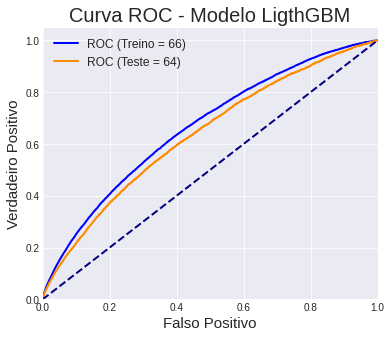

Acurácia, Gini e Área Curva ROC (Base de Treino):  82.38 32.0 66.0
Acurácia, Gini e Área Curva ROC (Base de Teste):  82.14 28.000000000000004 64.0


In [58]:
#ACURACIA
acc_lgb_train = round(accuracy_score(y_pred_lgb_train, y_train) * 100, 2)
acc_lgb_test = round(accuracy_score(y_pred_lgb_test, y_test) * 100, 2)

#ROC
fpr_lgb_train, tpr_lgb_train, thresholds = roc_curve(y_train, y_score_lgb_train)
roc_auc_lgb_train = 100*round(auc(fpr_lgb_train, tpr_lgb_train), 2)
gini_lgb_train = 100*round((2*roc_auc_lgb_train/100 - 1), 2)

fpr_lgb_test, tpr_lgb_test, thresholds = roc_curve(y_test, y_score_lgb_test)
roc_auc_lgb_test = 100*round(auc(fpr_lgb_test, tpr_lgb_test), 2)
gini_lgb_test = 100*round((2*roc_auc_lgb_test/100 - 1), 2)

#GRAFICO
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(6,5))
lw = 2
plt.plot(fpr_lgb_train, tpr_lgb_train, color='blue',lw=lw, label='ROC (Treino = %0.0f)' % roc_auc_lgb_train)
plt.plot(fpr_lgb_test, tpr_lgb_test, color='darkorange',lw=lw, label='ROC (Teste = %0.0f)' % roc_auc_lgb_test)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso Positivo', fontsize=15)
plt.ylabel('Verdadeiro Positivo', fontsize=15)
plt.legend(loc="lower right")
plt.legend(fontsize=12) 
plt.title('Curva ROC - Modelo LigthGBM', fontsize=20)
plt.show()

print('Acurácia, Gini e Área Curva ROC (Base de Treino): ',acc_lgb_train, gini_lgb_train, roc_auc_lgb_train)
print('Acurácia, Gini e Área Curva ROC (Base de Teste): ',acc_lgb_test, gini_lgb_test, roc_auc_lgb_test)

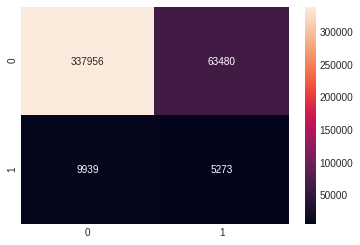

In [59]:
cm = confusion_matrix(y_train, y_pred_lgb_train)
sns.heatmap(cm, annot = True, fmt = 'g');

# Xgboost

In [60]:
xgboost = xgb.XGBClassifier(objective = 'binary:logistic',
                            scoring = 'roc_auc',
                            max_depth = 7,
                            n_estimators = 100,
                            verbose = 2,
                            learning_rate = 0.01)

xgboost.fit(x_train, y_train,
            early_stopping_rounds = 10, 
            eval_metric='auc',
            eval_set = [(x_train, y_train),(x_test, y_test)])   

#PREDICAO
y_pred_xgb_train = xgboost.predict(x_train)
y_score_xgb_train = xgboost.predict_proba(x_train)[:,1]

y_pred_xgb_test = xgboost.predict(x_test)
y_score_xgb_test = xgboost.predict_proba(x_test)[:,1]     

[0]	validation_0-auc:0.616153	validation_1-auc:0.605953
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.616688	validation_1-auc:0.60662
[2]	validation_0-auc:0.618894	validation_1-auc:0.607752
[3]	validation_0-auc:0.619102	validation_1-auc:0.608309
[4]	validation_0-auc:0.620624	validation_1-auc:0.609661
[5]	validation_0-auc:0.621909	validation_1-auc:0.610618
[6]	validation_0-auc:0.622082	validation_1-auc:0.6107
[7]	validation_0-auc:0.622126	validation_1-auc:0.610871
[8]	validation_0-auc:0.622699	validation_1-auc:0.611776
[9]	validation_0-auc:0.623102	validation_1-auc:0.611968
[10]	validation_0-auc:0.624952	validation_1-auc:0.61349
[11]	validation_0-auc:0.625448	validation_1-auc:0.613967
[12]	validation_0-auc:0.626424	validation_1-auc:0.614848
[13]	validation_0-auc:0.627114	validation_1-auc:0.615531
[14]	validation_0-auc:0.627395	validation_1-auc:0.615595
[1

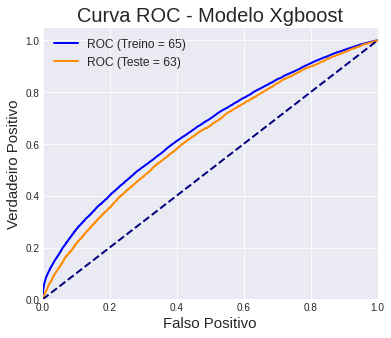

Acurácia, Gini e Área Curva ROC (Base de Treino):  96.35 30.0 65.0
Acurácia, Gini e Área Curva ROC (Base de Teste):  96.37 26.0 63.0


In [ ]:
#ACURACIA
acc_xgb_train = round(accuracy_score(y_pred_xgb_train, y_train) * 100, 2)
acc_xgb_test = round(accuracy_score(y_pred_xgb_test, y_test) * 100, 2)

#ROC
fpr_xgb_train, tpr_xgb_train, thresholds = roc_curve(y_train, y_score_xgb_train)
roc_auc_xgb_train = 100*round(auc(fpr_xgb_train, tpr_xgb_train), 2)
gini_xgb_train = 100*round((2*roc_auc_xgb_train/100 - 1), 2)

fpr_xgb_test, tpr_xgb_test, thresholds = roc_curve(y_test, y_score_xgb_test)
roc_auc_xgb_test = 100*round(auc(fpr_xgb_test, tpr_xgb_test), 2)
gini_xgb_test = 100*round((2*roc_auc_xgb_test/100 - 1), 2)

#GRAFICO
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(6,5))
lw = 2
plt.plot(fpr_xgb_train, tpr_xgb_train, color='blue',lw=lw, label='ROC (Treino = %0.0f)' % roc_auc_xgb_train)
plt.plot(fpr_xgb_test, tpr_xgb_test, color='darkorange',lw=lw, label='ROC (Teste = %0.0f)' % roc_auc_xgb_test)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso Positivo', fontsize=15)
plt.ylabel('Verdadeiro Positivo', fontsize=15)
plt.legend(loc="lower right")
plt.legend(fontsize=12) 
plt.title('Curva ROC - Modelo Xgboost', fontsize=20)
plt.show()

print('Acurácia, Gini e Área Curva ROC (Base de Treino): ',acc_xgb_train, gini_xgb_train, roc_auc_xgb_train)
print('Acurácia, Gini e Área Curva ROC (Base de Teste): ',acc_xgb_test, gini_xgb_test, roc_auc_xgb_test)

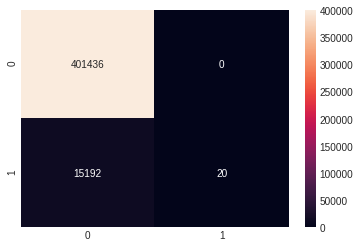

In [ ]:
cm = confusion_matrix(y_train, y_pred_xgb_train)
sns.heatmap(cm, annot = True, fmt = 'g');

# Comparação dos Modelos

In [ ]:
(
    pd.DataFrame(data = {'Modelos': ['Logistica','Arvore','Floresta','Gradiente Boost','LightGBM','XGBoost'],
                         'ROC': [roc_auc_logreg_test,roc_auc_dectree_test,roc_auc_rndforest_test,
                                 roc_auc_gbc_test,roc_auc_lgb_test,roc_auc_xgb_test]})\
    .sort_values(by = "ROC", ascending = False)
)

,Modelos,ROC
4,LightGBM,64.00
2,Floresta,63.00
5,XGBoost,63.00
3,Gradiente Boost,62.69
0,Logistica,62.10
1,Arvore,61.00


O melhor modelo então segundo a metrica de ROC é utlizando o algoritmo de LIGHTGBM.

# Rankeamento do Modelo Final

In [35]:
y_score_lgb_train_fx = pd.qcut(y_score_lgb_train, 10, labels = False)
resumo = pd.DataFrame({'FX': y_score_lgb_train_fx,'TARGET': y_train})

resumo\
  .groupby('FX')\
  .agg({'TARGET': [np.size, np.sum]})\
  .assign(target = lambda x: x[('TARGET',  'sum')]/x[('TARGET', 'size')])\
  .round(2)

TARGET       target
     size   sum       
FX                    
0   41665   440   0.01
1   41665   683   0.02
2   41665   922   0.02
3   41664  1055   0.03
4   41665  1203   0.03
5   41665  1369   0.03
6   41664  1655   0.04
7   41665  1861   0.04
8   41665  2356   0.06
9   41665  3668   0.09

---


**Autor**: Guilherme Ribeiro Maia

**Contato**: 
email: `gribeiromaia91@gmail.com`

linkedin: https://www.linkedin.com/in/guilherme-ribeiro-maia-650589112/

<br>
<img align="left" width="280" src="https://hermes.digitalinnovation.one/site/images/logo-sm-white.png"/>
<br>